In [3]:
import pandas as pd

beer = pd.read_csv('data.txt', sep=' ')

In [4]:
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [5]:
X=beer[['calories','sodium','alcohol','cost']]

In [6]:
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters = 3).fit(X)
km2 = KMeans(n_clusters = 2).fit(X)

In [9]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2])

In [10]:
beer['cluster']=km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
10,Coors,140,18,4.6,0.44,0,1


In [11]:
from pandas.tools.plotting import scatter_matrix
% matplotlib inline

In [12]:
cluster_center = km.cluster_centers_
cluster_center_2 = km2.cluster_centers_

In [13]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.666667
1,150.000000,17.000000,4.521429,0.520714,0.000000


In [14]:
centers = beer.groupby('cluster').mean().reset_index()

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] =14

In [16]:
import numpy as np
colors = np.array(['red','green','blue','yellow'])

Text(0,0.5,'Alcohol')

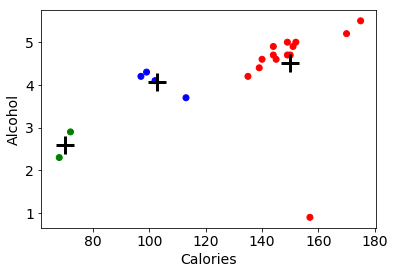

In [17]:
plt.scatter(beer['calories'], beer['alcohol'], c= colors[beer['cluster']])

plt.scatter(centers.calories, centers.alcohol, linewidth =3, marker = "+", s =300 , c='black')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

C:\Users\caoli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


Text(0.5,0.98,'With 2 centriods initiatlized')

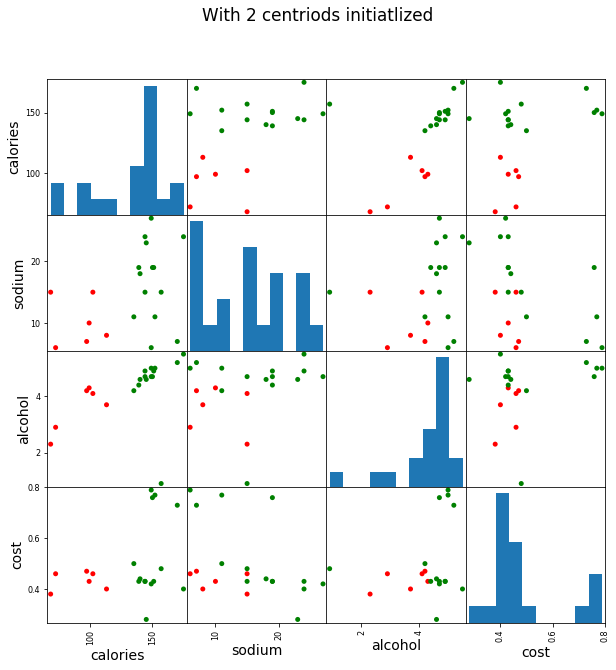

In [18]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']], s=100, alpha = 1, c=colors[beer['cluster2']], figsize = (10,10))
plt.suptitle('With 2 centriods initiatlized')

In [19]:
from sklearn.preprocessing import StandardScaler 

In [20]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

C:\Users\caoli\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\caoli\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [21]:
km_scaled = KMeans(n_clusters=3).fit(X_scaled)
km_scaled

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
km_scaled.labels_

array([2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0])

In [23]:
beer['scaled_cluster'] =km_scaled.labels_

In [24]:
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
9,Budweiser_Light,113,8,3.7,0.40,2,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0
11,Coors_Light,102,15,4.1,0.46,2,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0,0
8,Miller_Lite,99,10,4.3,0.43,2,0,0
19,Schlitz_Light,97,7,4.2,0.47,2,0,0
2,Lowenbrau,157,15,0.9,0.48,0,1,0
4,Heineken,152,11,5.0,0.77,0,1,1
3,Kronenbourg,170,7,5.2,0.73,0,1,1


In [25]:
avgscaled = beer.groupby('scaled_cluster').mean()

C:\Users\caoli\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283FF416898>,
      dtype=object)

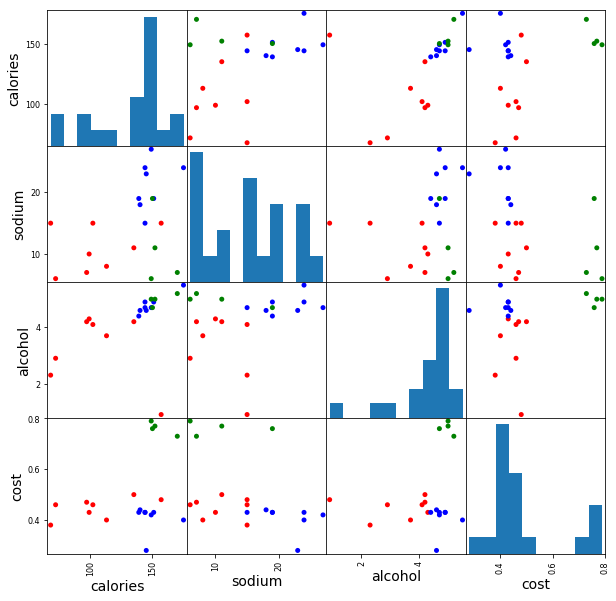

In [26]:
pd.scatter_matrix(X,c =colors[beer.scaled_cluster], alpha = 1, figsize = (10,10), s =100)

In [28]:
from sklearn import metrics

score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X, beer.cluster)
print(score_scaled, score)

0.1797806808940007 0.6731775046455796


In [31]:
scores = []

for k in range(2,20):
    labels=KMeans(n_clusters = k).fit(X).labels_
    score = metrics.silhouette_score(X,labels)
    scores.append(score)
    
scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.3658612182712316,
 0.3915697409245163,
 0.41282646329875183,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

Text(0,0.5,'Sihouette Score')

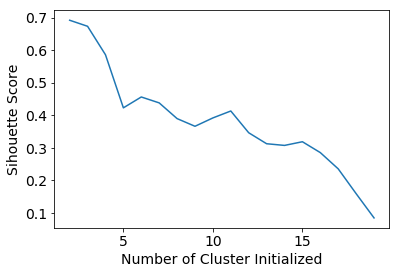

In [32]:
plt.plot(list(range(2,20)),scores)
plt.xlabel('Number of Cluster Initialized')
plt.ylabel('Sihouette Score')

### DBSCAN Clustering ###

In [33]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 10, min_samples = 2).fit(X)

In [34]:
labels = db.labels_

In [39]:
beer['cluster_db'] =labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,2,0,0,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,1,-1
6,Augsberger,175,24,5.5,0.40,0,1,2,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,2,0
16,Hamms,139,19,4.4,0.43,0,1,2,0
14,Kirin,149,6,5.0,0.79,0,1,1,0
13,Becks,150,19,4.7,0.76,0,1,1,0
12,Michelob_Light,135,11,4.2,0.50,0,1,0,0
10,Coors,140,18,4.6,0.44,0,1,2,0
0,Budweiser,144,15,4.7,0.43,0,1,2,0


In [41]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,1.416667
1,99.333333,10.666667,4.200000,0.453333,2.000000,0.000000,0.000000
2,70.000000,10.500000,2.600000,0.420000,1.000000,0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283FFA025F8>,
      dtype=object)

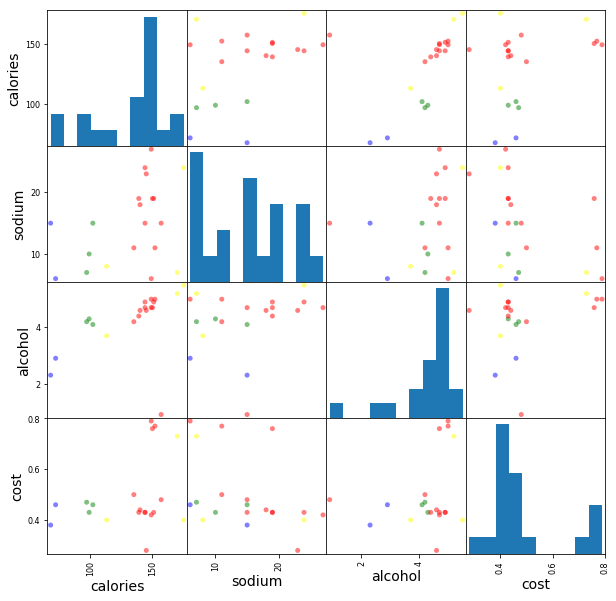

In [46]:
pd.plotting.scatter_matrix(X,c = colors[beer.cluster_db], figsize=(10,10), s= 100)

In [48]:
from sklearn import metrics
dbscore = metrics.silhouette_score(X,beer.cluster_db)
dbscore

0.49530955296776086

In [65]:
db_scores=[]

for i in range(2,25):
        db_labels=DBSCAN(eps = i, min_samples = j).fit(X).labels_
        db_score = metrics.silhouette_score(X, db_labels)
        db_scores.append(db_score)
db_scores
#best score occurs when eps in range(19, 23)

[-0.03670705609846274,
 -0.03670705609846274,
 -0.06781609566358748,
 -0.06781609566358748,
 0.1626084889128696,
 0.12626205982196476,
 0.16564759416041527,
 0.42951251219183106,
 0.49530955296776086,
 0.49530955296776086,
 0.49530955296776086,
 0.49530955296776086,
 0.5857040721127795,
 0.5857040721127795,
 0.5238781710613801,
 0.5238781710613801,
 0.6731775046455796,
 0.6731775046455796,
 0.6731775046455796,
 0.6731775046455796,
 0.6731775046455796,
 0.5461749427168023,
 0.5461749427168023]